In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import train data
ne_train = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/ne_train.csv")
s_train = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/s_train.csv")

# Import test data
ne_test = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/ne_test.csv")
s_test = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/s_test.csv")

# Normality Test
- If data is normally distributed --> detect outliers for normal distributions
- If not --> detect outliers for skewed distributions
- Both NE and S are not normally distributed

(array([44., 40., 17.,  9.,  8., 10.,  8.,  5.,  8.,  2.]),
 array([3.0000e+00, 2.1760e+03, 4.3490e+03, 6.5220e+03, 8.6950e+03,
        1.0868e+04, 1.3041e+04, 1.5214e+04, 1.7387e+04, 1.9560e+04,
        2.1733e+04]),
 <BarContainer object of 10 artists>)

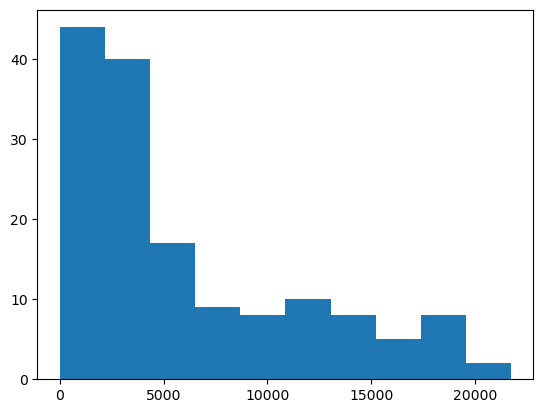

In [3]:
plt.hist(ne_train.covid_19_confirmed_cases)

(array([29., 55., 23.,  7.,  3.,  5.,  4.,  8., 11.,  6.]),
 array([1.00000e+00, 3.22590e+03, 6.45080e+03, 9.67570e+03, 1.29006e+04,
        1.61255e+04, 1.93504e+04, 2.25753e+04, 2.58002e+04, 2.90251e+04,
        3.22500e+04]),
 <BarContainer object of 10 artists>)

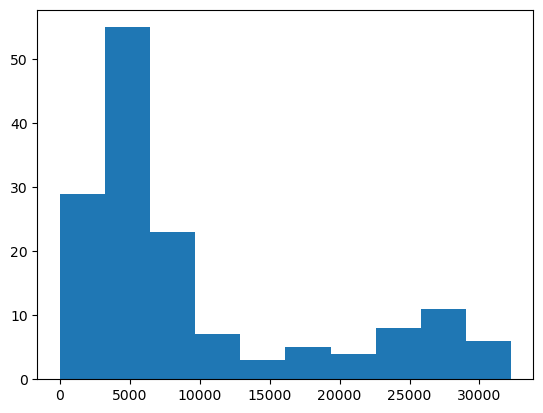

In [4]:
plt.hist(s_train.covid_19_confirmed_cases)

# Outlier Detection
- Use Inter-Quartile Range (IQR) proximity rule
    - The data points that fall below Q1 – 1.5 IQR or above the third quartile Q3 + 1.5 IQR are outliers
    - IQR = Q3 – Q1
- NE: 1.3% of data is outliers --> not significant
- S: 15.2% of data is outliers --> could be significant
    - Must keep in mind that there are only 151 instances in the train sets

In [17]:
def detect_outliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    outliers = [x for x in data[col] if (
        (x < lower_range) or (x > upper_range))]
    
    return len(outliers)/data.shape[0]*100

In [18]:
detect_outliers(ne_train, "covid_19_confirmed_cases")

1.3245033112582782

In [19]:
detect_outliers(s_train, "covid_19_confirmed_cases")

15.2317880794702